In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h3>Question 1 </h3>

Answer A: If Si,max is not exceeded, the Pe into the soil will be zero

In [2]:
'''Use this code block if you have the Camel Data files saved locally'''
# #Load in Precipitation Data
# df_camel = pd.read_csv('../Data/Prep_Camel_SILO.csv')
# df_camel['time'] = pd.to_datetime(df_camel[['year', 'month', 'day']])
# df_camel.drop(['day', 'year', 'month'], axis= 1, inplace = True)
# df_camel.set_index('time', inplace=True)
# df_camel = df_camel['212260']

# #Load in Camel Evap Data
# df_evap = pd.read_csv('../Data/evap_syn_SILO.csv')
# df_evap['time'] = pd.to_datetime(df_evap[['year', 'month', 'day']])
# df_evap.drop(['day', 'year', 'month'], axis= 1, inplace = True)
# df_evap.set_index('time', inplace=True)
# df_evap = df_evap['212260']

# df_camel_data = pd.concat([df_camel, df_evap], axis = 1)

# df_camel_data.columns = ['P', 'Evap']
# df_camel_data.index = df_camel_data.index.date

'Use this code block if you have the Camel Data files saved locally'

In [3]:
'''Use this code block when you are working from Github'''
#Load in Precipitation Data
df_camel = pd.read_csv('../Data/Prep_Camel_212260.csv')
df_camel['time'] = pd.to_datetime(df_camel['time'])
df_camel.set_index('time', inplace=True)

#Load in Camel Evap Data
df_evap = pd.read_csv('../Data/Evap_Camel_212260.csv')
df_evap['time'] = pd.to_datetime(df_evap['time'])
df_evap.set_index('time', inplace=True)

df_camel_data = pd.concat([df_camel, df_evap], axis = 1)

df_camel_data.columns = ['P', 'Evap']
df_camel_data.index = df_camel_data.index.date

In [4]:
#Load in Discharge Data
df = pd.read_csv('../Data/5202145_Q_Day.Cmd.txt', sep=';', skiprows= 36, usecols=[0,2], index_col=0, encoding='latin-1', parse_dates=True)
df.rename(columns={' Value': 'Q'}, inplace=True)
df.index = df.index.date
df = pd.merge(df, df_camel_data, left_index=True, right_index=True, how = 'inner')
df.dropna(axis = 0, inplace=True)

df

,Q,P,Evap
1968-05-19,3.009,9.996204,1.175430
1968-05-20,3.104,1.278546,1.269269
1968-05-21,3.425,0.000000,1.193374
1968-05-22,3.934,0.707056,1.236318
1968-05-23,3.246,1.862787,0.983918
...,...,...,...
2018-12-27,0.900,0.000000,9.363467
2018-12-28,0.755,0.096275,9.325681
2018-12-29,0.654,0.349248,9.475430
2018-12-30,0.582,0.000000,9.073066


In [5]:
df['P'] = df['P'] * 75000**2 / 1000
df['Evap'] = df['Evap'] * 75000**2 / 1000
df['Q'] = df['Q'] * 60*24

In [6]:
P_C1 = df['P'].values
EP_C1 = df['Evap'].values


#Pe in Germany
Si_max = 2.5 * 75000**2 / 1000
Si_1 = np.zeros(len(P_C1))
Pe_1 = np.zeros(len(P_C1))

for i in range(len(Si_1)):
    if i == 0:
        Si_1[i] = 0 + P_C1[i]
    else:
        Si_1[i] = Si_1[i-1] + P_C1[i]

    if Si_1[i] >= Si_max:
        Pe_1[i] = Si_1[i] - Si_max
        Si_1[i] = Si_max
        
    Si_1[i] -= EP_C1[i]
    if Si_1[i] <=0:
        Si_1[i] = 0

df['Si'] = Si_1
df['Pe'] = Pe_1

ratio_1 = df['Pe'].mean() /P_C1.mean()
ratio_1


0.718416529216734

<h3> Question 2 </h3>

In [7]:
#Forested
p_forest  = df['P'].values
ET_avg_forest = df['P'].mean() - df['Q'].mean()
ET_daily_forest = df['Evap'] / df['Evap'].mean() * ET_avg_forest

SD_min_forest = np.zeros(len(p_forest))
for i in range(len(p_forest)):
    if i == 0:
        SD_min = min(0, p_forest[i] - ET_daily_forest[i])
    else:
        SD_min = min(0, (p_forest[i] - ET_daily_forest[i] + SD_min_forest[i -1]))
    SD_min_forest[i] = SD_min


df['Deficit'] = SD_min_forest
SD_forest_year  = np.max(-SD_min_forest)
print(SD_forest_year)






C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_42872\2411891374.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SD_min = min(0, p_forest[i] - ET_daily_forest[i])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_42872\2411891374.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SD_min = min(0, (p_forest[i] - ET_daily_forest[i] + SD_min_forest[i -1]))


12635917456.944271


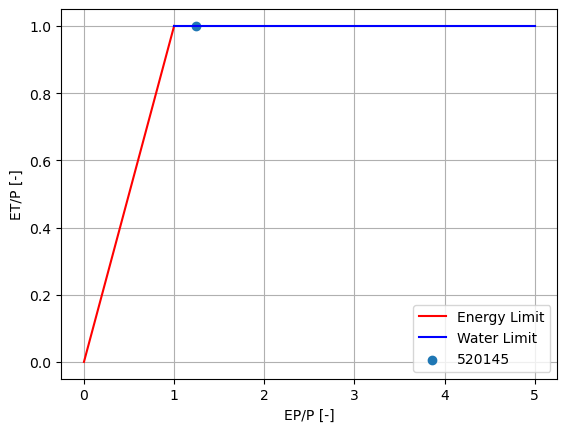

In [8]:
ETP_forest = ET_avg_forest / df['P'].mean()
EPP_forest = df['Evap'].mean() / df['P'].mean()


E_p = np.array([0,1])
E_a = np.array([0,1])
E_p2 = np.arange(1, 6)
E_a2 = np.ones(len(E_p2))


plt.plot(E_p, E_a, 'r', label = 'Energy Limit')
plt.plot(E_p2, E_a2, 'b', label = 'Water Limit')
plt.scatter(EPP_forest, ETP_forest, label = '520145')
plt.grid()
plt.legend()
plt.xlabel('EP/P [-]')
plt.ylabel('ET/P [-]')
plt.show()

